In [24]:
import numpy as np
#from conf_exp6 import *
%pylab inline
#import seaborn
import matplotlib.pyplot as plt
import utils.img_utils as iu
import json


def mm(A, cast_int=True):
    if cast_int:
        return (int(A.min()), int(A.max()))
    else:
        return (A.min(), A.max())

Populating the interactive namespace from numpy and matplotlib


/home/leexgo1987/apps/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'mean', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [50]:
parameter_name = 'lamda'
#idjob='201610141834'
#idjob='201610160213'
idjob='201610172354'

formula = 'f1'
base_folder = './results/exp6pixel/%s/%s.%s/'%(formula, parameter_name, idjob)


with open(base_folder + 'data.json') as data_file:    
    data = json.load(data_file)

params_range = data['params_range']
rango = params_range[parameter_name]
#rango = np.arange(100, 1001, 100)

GROUPS=5
FITS=10
RANGO=len(rango)
print rango 

mse = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse1000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse2000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse3000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
a = np.zeros((RANGO), dtype='float')

name_tmp1 = base_folder + 'mse_g%d_f%d'+'.npy'
name_tmp2 = base_folder + 'mse%d_g%d_f%d'+'.npy'
for group in xrange(GROUPS):
    #if group==0 : continue
    for fit in xrange(FITS):
        #if fit == 0 : continue
        print 'loading', name_tmp1%(group, fit)
        tmp = np.load(name_tmp1%(group, fit))
        a = a + tmp
        mse[:, fit, group] = tmp
        mse1000[:, fit, group] = np.load(name_tmp2%(1000, group, fit))
        mse2000[:, fit, group] = np.load(name_tmp2%(2000, group, fit))
        mse3000[:, fit, group] = np.load(name_tmp2%(3000, group, fit))

a = a / (FITS*GROUPS)
        
print mse.shape, mse1000.shape, mse2000.shape, mse3000.shape


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f0.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f1.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f2.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f3.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f4.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f5.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f6.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f7.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f8.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g0_f9.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g1_f0.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g1_f1.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g1_f2.npy
loading ./results/exp6pixel/f1/lamda.201610172354/mse_g1_f3.npy
loading ./results/exp6pixel/f1/lamda.201610172354/ms

In [51]:
mean= mse.mean(axis=2).mean(axis=1)
var = np.std(np.std(mse, axis=2), axis=1)
print 'mean', mean
print 'var', var
print 'mean=',mean#, var.shape

#print mse[:, 0 , 0]
#print mse[:, 0 , 1]
#print mse[:, 0 , 2]

acum = np.zeros(mse.shape[0])
n =0
for f in xrange(10):
    for g in xrange(5):
        acum = acum + mse[:, f, g]
        n=n+1


mean2 = acum/n


print mean
print mean2


mean [  1.11877184e+08   1.11877184e+08   1.11877184e+08   1.11877184e+08
   1.11877184e+08   1.11877184e+08   1.11877184e+08   1.11877184e+08
   1.11877184e+08   1.11877184e+08]
var [  4.11062944e+08   4.11062944e+08   4.11062944e+08   4.11062944e+08
   4.11062944e+08   4.11062944e+08   4.11062944e+08   4.11062944e+08
   4.11062944e+08   4.11062944e+08]
mean= [  1.11877184e+08   1.11877184e+08   1.11877184e+08   1.11877184e+08
   1.11877184e+08   1.11877184e+08   1.11877184e+08   1.11877184e+08
   1.11877184e+08   1.11877184e+08]
[  1.11877184e+08   1.11877184e+08   1.11877184e+08   1.11877184e+08
   1.11877184e+08   1.11877184e+08   1.11877184e+08   1.11877184e+08
   1.11877184e+08   1.11877184e+08]
[  1.11877177e+08   1.11877177e+08   1.11877177e+08   1.11877177e+08
   1.11877177e+08   1.11877177e+08   1.11877177e+08   1.11877177e+08
   1.11877177e+08   1.11877177e+08]


In [52]:
print rango
mean1000 = mse1000.mean(axis=2).mean(axis=1)
var1000 = np.std(np.std(mse1000, axis=2), axis=0)
print mean1000, mean1000.shape, mse1000.shape
print var1000

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
[  1.01822168e+08   1.01822168e+08   1.01822168e+08   1.01822168e+08
   1.01822168e+08   1.01822168e+08   1.01822168e+08   1.01822168e+08
   1.01822168e+08   1.01822168e+08] (10,) (10, 10, 5)
[  0.00000000e+00   3.29851275e-08   0.00000000e+00   7.90253374e-09
   9.60662749e-09   1.28000000e+02   8.16170243e-09   1.86264515e-09
   0.00000000e+00   2.82238375e-08]


In [53]:
print rango
mean2000 = mse2000.mean(axis=2).mean(axis=1)
var2000 = np.std(np.std(mse2000, axis=2), axis=1)

print mean2000, mean2000.shape, mse2000.shape

print var2000

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
[ 54731756.  54731756.  54731756.  54731756.  54731756.  54731756.
  54731756.  54731756.  54731756.  54731756.] (10,) (10, 10, 5)
[  2.01097312e+08   2.01097312e+08   2.01097312e+08   2.01097312e+08
   2.01097312e+08   2.01097312e+08   2.01097312e+08   2.01097312e+08
   2.01097312e+08   2.01097312e+08]


In [54]:
#rango = np.arange(100, 1001, 100)
print mean.shape, rango
mean3000 = mse3000.mean(axis=2).mean(axis=1)
var3000 = np.std(np.std(mse3000, axis=2), axis=1)
print mean3000
print var3000

(10,) [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
[  1.57070608e+08   1.57070608e+08   1.57070608e+08   1.57070608e+08
   1.57070608e+08   1.57070608e+08   1.57070608e+08   1.57070608e+08
   1.57070608e+08   1.57070608e+08]
[  5.77114240e+08   5.77114240e+08   5.77114240e+08   5.77114240e+08
   5.77114240e+08   5.77114240e+08   5.77114240e+08   5.77114240e+08
   5.77114240e+08   5.77114240e+08]


(10,) (10, 3)
medias= 1.11877e+08 1.01822e+08 5.47318e+07 1.57071e+08
std= 5.48084e+08 4.98825e+08 2.6813e+08 7.69486e+08
mean1000 [  1.01822168e+08   1.01822168e+08   1.01822168e+08   1.01822168e+08
   1.01822168e+08   1.01822168e+08   1.01822168e+08   1.01822168e+08
   1.01822168e+08   1.01822168e+08]
mean2000 [ 54731756.  54731756.  54731756.  54731756.  54731756.  54731756.
  54731756.  54731756.  54731756.  54731756.]
mean [  1.11877184e+08   1.11877184e+08   1.11877184e+08   1.11877184e+08
   1.11877184e+08   1.11877184e+08   1.11877184e+08   1.11877184e+08
   1.11877184e+08   1.11877184e+08] 1.11877e+08
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
dir ./results/exp6pixel/f1/lamda.201610172354/res/ created!


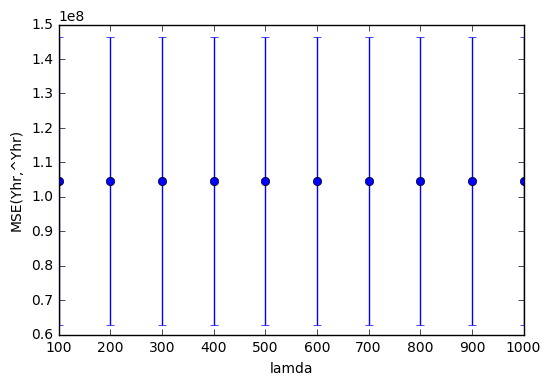

In [57]:
#rango = np.arange(100, 1001, 100)

mean3 = np.zeros((mean1000.shape[0], 3))
print mean2000.shape, mean3.shape
mean3[:, 0] = mean1000
mean3[:, 1] = mean2000
mean3[:, 2] = mean3000

#plt.plot(rango, mean3000,'o', label='b=3000')
#plt.plot(rango, mean1000, 'o', label='b=1000')
#plt.plot(rango, mean2000,'o', label='b=2000')
#plt.plot(rango, mean3.mean(axis=1),'o', label='b=all')
#plt.plot(rango, mean,'o', label='b=all')

#plt.plot(rango, mean+var,'o', label='b=all')
#plt.plot(rango, mean-var,'o', label='b=all')

#plt.errorbar(rango, mean, yerr=var, fmt='o', label='b=all')
plt.errorbar(rango, mean3.mean(axis=1), yerr=np.std(mean3, axis=1), fmt='o')


plt.legend()
plt.ylabel('MSE(Yhr,^Yhr)')
plt.xlabel(parameter_name)
#plt.legend(lala , loc=2, bbox_to_anchor=(1, 0.5))
#plt.ylim((1102000.0, 1102300.0))
mse[:,2,1]
#print plt.ylim((940000000.0, 960000000.0))

print 'medias=',mse.mean(),mse1000.mean(), mse2000.mean(), mse3000.mean() 
print 'std=',np.std(mse),np.std(mse1000), np.std(mse2000), np.std(mse3000) 
print 'mean1000', mean1000
print 'mean2000', mean2000
print 'mean', mean, mean.min()
print rango

import os
if not os.path.exists(base_folder+ 'res/'):
    try:
        os.makedirs(base_folder+ 'res/')
        print 'dir', base_folder+ 'res/', 'created!' 
    except OSError, e :
        print str(e)


## Para grabar
plt.savefig(base_folder+ 'res/lamda_mean_var_idjob'+idjob+'.pdf')

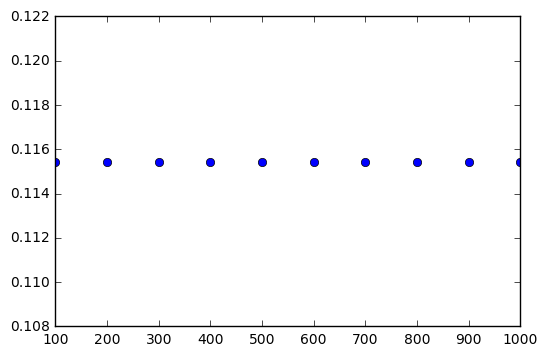

In [58]:
## Para grabar
g=4
for g in xrange(1):
    for i in xrange(1):
        a = plt.plot(rango, mse[:, i, g],'o')
    #plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_g'+str(g)+'_f'+str(i)+'.png')
    
    
#plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_all.png')
    

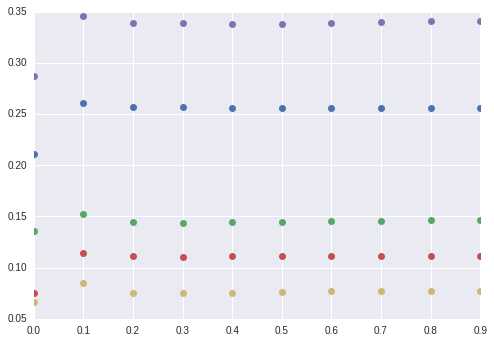

In [56]:
cluster = '1'
if cluster == '0':
    plt.plot(rango, mse[:, 0, 0],'o')
    plt.plot(rango, mse[:, 6, 0],'o')
    plt.plot(rango, mse[:, 7, 0],'o')

if cluster == '1':
    plt.plot(rango, mse[:, 1, 1],'o')
    plt.plot(rango, mse[:, 2, 1],'o')
    #plt.plot(rango, mse[:, 3, 0],'o')
    plt.plot(rango, mse[:, 4, 1],'o')
    plt.plot(rango, mse[:, 5, 1],'o')
    plt.plot(rango, mse[:, 8, 1],'o')



(-0.33758634, 1.9059533)
A_g0_val0.
(-0.33758634, 1.9059533)
A_g0_val1.
(-0.33758634, 1.9059533)
A_g0_val2.
(-0.33758634, 1.9059533)
A_g0_val3.
(-0.33758634, 1.9059533)
A_g0_val4.
(-0.33758634, 1.9059533)
A_g0_val5.
(-0.33758634, 1.9059533)
A_g0_val6.
(-0.33758634, 1.9059533)
A_g0_val7.
(-0.33758634, 1.9059533)
A_g0_val8.
(-0.33758634, 1.9059533)
A_g0_val9.
(-1.0730458, 1.8602544)
A_g1_val0.
(-1.0730458, 1.8602544)
A_g1_val1.
(-1.0730458, 1.8602544)
A_g1_val2.
(-1.0730458, 1.8602544)
A_g1_val3.
(-1.0730458, 1.8602544)
A_g1_val4.
(-1.0730458, 1.8602544)
A_g1_val5.
(-1.0730458, 1.8602544)
A_g1_val6.
(-1.0730458, 1.8602544)
A_g1_val7.
(-1.0730458, 1.8602544)
A_g1_val8.
(-1.0730458, 1.8602544)
A_g1_val9.
(-0.11081468, 1.5682456)
A_g2_val0.
(-0.11081468, 1.5682456)
A_g2_val1.
(-0.11081468, 1.5682456)
A_g2_val2.
(-0.11081468, 1.5682456)
A_g2_val3.
(-0.11081468, 1.5682456)
A_g2_val4.
(-0.11081468, 1.5682456)
A_g2_val5.
(-0.11081468, 1.5682456)
A_g2_val6.
(-0.11081468, 1.5682456)
A_g2_val7.
(-

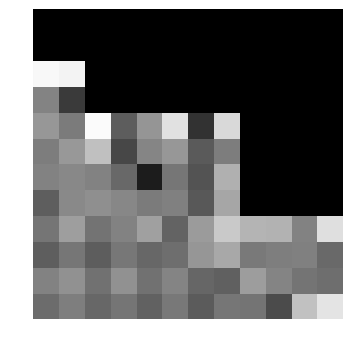

In [63]:
name_tmp3 = base_folder + 'A_g%d_val%d.npy'

for g in xrange(GROUPS):
    #if g == 0 : continue
    for i_val in xrange(len(rango)):
        val = rango[i_val]
        A = np.load(name_tmp3%(g,i_val))
        print mm(A, cast_int=False)
        plt = iu._is(A, vmin=0, vmax=1.5)
        name_img = ('A_g%d_val%d.npy'%(g, i_val))[:-3]
        print name_img
        plt.savefig(base_folder+ '/res/'+name_img +'png')

(0.00096415909, 4.4262066)
i_hr_g0.
(0.0, 51.797764)
i_hr_g1.
(0.0, 32.989147)
i_hr_g2.
(0.0, 4.1959381)
i_hr_g3.
(0.0, 4.2103333)
i_hr_g4.


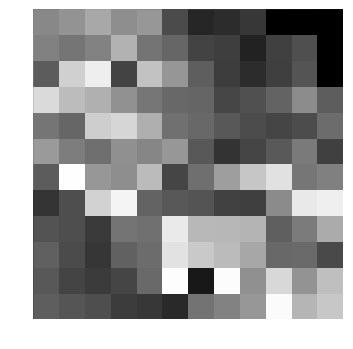

In [65]:
name_tmp4 = base_folder + 'i_hr_g%d.npy'
for g in xrange(5):
    #if g == 0 : continue
    A = np.load(name_tmp4%(g,))
    print mm(A, cast_int=False)
    plt = iu._is(A, vmin=0, vmax=1.5)
    name_img = ('i_hr_g%d.png'%(g))[:-3]
    print name_img
    plt.savefig(base_folder + '/res/' +name_img)

In [61]:
name_tmp4 = base_folder + 'i_hr_g%d.npy'
for g in xrange(5):
    A = np.load(name_tmp3%(g,))
    i_hr = np.load(name_tmp4%(g,))
    #print mm(A, cast_int=False)
    plt = iu._isc(A,i_hr, vmin=0, vmax=1, titles=['reconstructed', 'original'])
    name_img = base_folder + ('cmp_g%d'%(g))
    print name_img
    plt.savefig(name_img +'.png')

TypeError: not enough arguments for format string

In [9]:
i_hr = np.load(base_folder+'i_hr_g0.npy')
A910000 = np.load(base_folder+'A_g0_lamda910000.npy')
iu._isc(A910000,i_hr, vmax=1.4)
A910000.min(), A910000.max(), A910000.shape
del(A100)

IOError: [Errno 2] No such file or directory: './results/exp6/f1/gamma/A_g0_lamda910000.npy'

(0.0, 2729.8464)

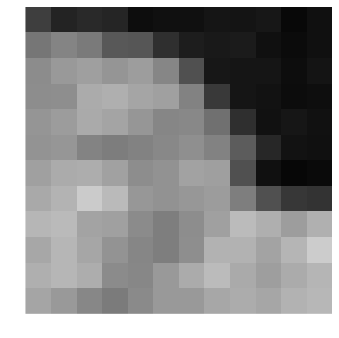

In [16]:
iu._is(i_hr, vmax=2729)
i_hr.min(),i_hr.max()

(-1.5125681573504312e-05, 1.4016132523250628, (12, 12, 12, 270))

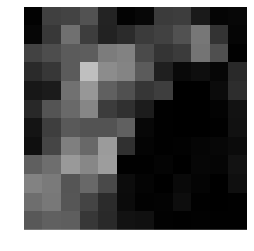

In [51]:
A1000 = np.load(base_folder+'A_g0_lamda1000.npy')
iu._is(A1000, vmax=A1000.max())
A1000.min(), A1000.max(), A1000.shape

(-1.5125681573504312e-05, 1.4016132523250628, (12, 12, 12, 270))

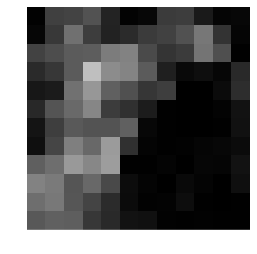

In [51]:
A1000 = np.load(base_folder+'A_g0_lamda3000.npy')
iu._is(A1000, vmax=A1000.max())
A1000.min(), A1000.max(), A1000.shape

In [30]:
alala = []
for val in rango :
    alala.append(val)
    
print alala

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
